In [9]:
import numpy as np
import pandas as pd
import h5py
import os
import healpy as hp
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)

In [3]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [5]:
color1 = '#121f1f'
color2 = '#eba75f'
mycmap = LinearSegmentedColormap.from_list("my_cmap", [color1, color2])

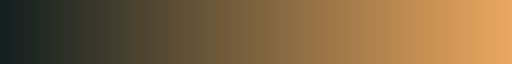

In [6]:
mycmap

In [ ]:
user = 'ulyanadupletsa'
PATH_TO_MAPS = '/Users/' + str(user) + '/Documents/Radio-Sirens/maps/'

In [17]:
#halofit maps
cls = {}
count_data = {}
count_map = {}
shot_noise = {}
mean_count_per_pix = {}
np.random.seed(42)
for file in os.listdir(PATH_TO_MAPS + 'count_maps/'):
    # strip string to get the redshit range out of the name of the map
    name_strips = file.split('_')
    snapshot, zmin, zmax, nside = name_strips[2][8:10], name_strips[3][4:8], name_strips[4][4:8], name_strips[5][5:8]
    zmean = np.round((float(zmin) + float(zmax))/2, 3)
    count_data[str(zmean)] = np.loadtxt(PATH_TO_MAPS + 'count_maps/' + file)
    # REMEMBER TO USE THE ORIGINAL PIXELIZATION
    npix = hp.nside2npix(int(nside))
    mean_count_per_pix[str(zmean)] = np.sum(count_data[str(zmean)])/npix

    count_map[str(zmean)] = (count_data[str(zmean)] - mean_count_per_pix[str(zmean)])/mean_count_per_pix[str(zmean)]
    hp.mollview(count_map[str(zmean)], cmap=mycmap, title='z=%s' %(zmean))
    # Adjust title font size using graticule
    hp.graticule(verbose=False)  # Ensures grid is added
    plt.title('z=%s' % (zmean), fontsize=18)  # Adjust font size
    plt.savefig('plots/maps/map_snapshot_%s.pdf' %snapshot)
    plt.close() 

/Users/ulyanadupletsa/.local/lib/python3.10/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.graticule(dpar=dpar, dmer=dmer, coord=coord, local=local, **kwds)
/Users/ulyanadupletsa/.local/lib/python3.10/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.graticule(dpar=dpar, dmer=dmer, coord=coord, local=local, **kwds)
/Users/ulyanadupletsa/.local/lib/python3.10/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.graticule(dpar=dpar, dmer=dmer, coord=coord, local=local, **kwds)
/Users/ulyanadupletsa/.local/lib/python3.10/site-packages/healpy/visufunc.py:1503: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  ax.gratic